# Police prob to attend accident

## May 2020

### Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score, make_scorer
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, roc_auc_score,  classification_report, mean_squared_error
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb






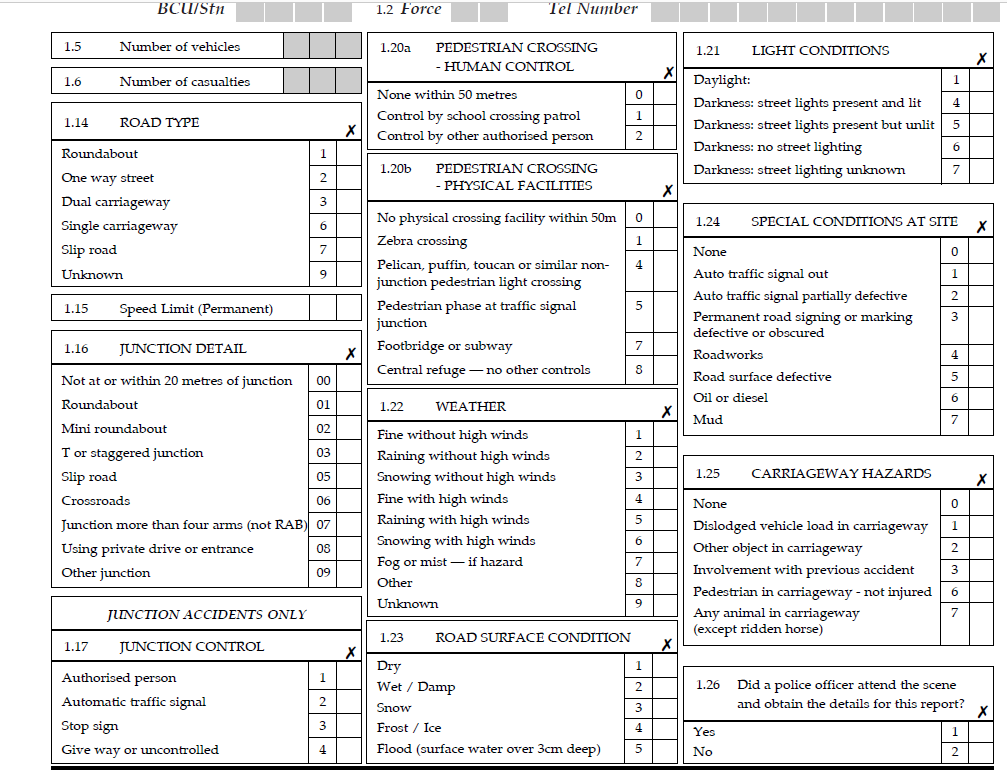

In [2]:
from IPython.display import Image
Image(filename='Info_on_vars.png') 

###### Data import

In [2]:
original_data = pd.read_csv('train_data.csv', delimiter=',', encoding='latin1')

In [3]:
data = original_data.copy()

### Taking a look to the target var

In [4]:
data.Did_Police_Officer_Attend_Scene_of_Accident.unique()

array([ 1,  2, -1], dtype=int64)

In [6]:
data['Did_Police_Officer_Attend_Scene_of_Accident']=data['Did_Police_Officer_Attend_Scene_of_Accident'].replace(2,0)
### TARGET VAR 
## Delete -1 value
data.drop(data.loc[data['Did_Police_Officer_Attend_Scene_of_Accident']==-1].index, inplace=True)

### Understanding thw distribution of the target variable ( weight )

In [5]:
data.Did_Police_Officer_Attend_Scene_of_Accident.unique()

array([ 1,  2, -1], dtype=int64)

In [6]:
data['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

 1    113358
 2     25301
-1         1
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

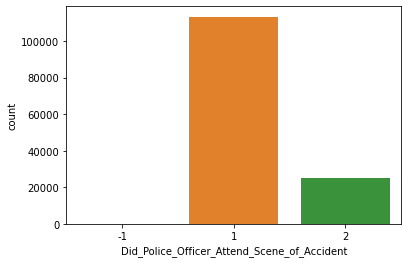

In [7]:
#sns.countplot(x='Did_Police_Officer_Attend_Scene_of_Accident', data=data, palette='hls')
sns.countplot(x='Did_Police_Officer_Attend_Scene_of_Accident', data=data)
plt.show()

In [8]:
data.groupby('Did_Police_Officer_Attend_Scene_of_Accident').mean()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area
Did_Police_Officer_Attend_Scene_of_Accident,,,,,,,,,,,,,,,,,,,,,
-1,148603.000000,829900.000000,-6.174026,57.290364,91.000000,3.000000,2.000000,3.000000,4.000000,927.000000,...,3.000000,863.000000,0.000000,0.000000,1.000000,9.000000,-1.000000,0.000000,0.000000,2.000000
1,443384.949417,295191.625364,-1.382143,52.544273,30.622162,2.816211,1.838062,1.361889,4.107086,350.939713,...,2.666473,357.404912,0.006951,0.811015,1.992705,1.489273,1.371478,0.107244,0.077683,1.379876
2,449896.267183,287418.351449,-1.285053,52.474503,30.450338,2.920715,1.760879,1.157504,4.147623,351.068653,...,2.933046,420.816371,0.008419,0.890360,1.785661,1.785977,1.237817,0.071183,0.051223,1.231730


##### Show data types

In [11]:
data.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [10]:
data.rename(columns={'Local_Authority_(District)':'Local_Authority_District',
                       'Local_Authority_(Highway)':'Local_Authority_Highway',

                     'Pedestrian_Crossing-Human_Control':'Pedestrian_Crossing_Human_Control',
                          'Pedestrian_Crossing-Physical_Facilities':'Pedestrian_Crossing_Physical_Facilities'}, 
                 inplace=True)

### Label Encoding


In [11]:
encoder = LabelEncoder()
data['Local_Authority_Highway'] = encoder.fit_transform(data.Local_Authority_Highway.values)
data['Local_Authority_District'] = encoder.fit_transform(data.Local_Authority_District.values)



 ### Searching null values
 

In [14]:
data.isna().sum()

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              8
Local_Authority_District                          0
Local_Authority_Highway                           0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

###### Fisrt look at dataframe

In [15]:
data.head() 

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing_Human_Control,Pedestrian_Crossing_Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201301BS70003,527060,177970,-0.171402,51.486361,1,2,2,1,02/01/2013,...,0,0,1,1,1,0,0,1,1,E01002844
1,201301BS70005,526900,178940,-0.173356,51.495115,1,3,1,2,04/01/2013,...,0,5,1,8,1,0,0,1,1,E01002821
2,201301BS70006,524240,181460,-0.210767,51.518353,1,3,1,1,07/01/2013,...,0,1,1,1,1,0,0,1,1,E01002878
3,201301BS70007,524320,181290,-0.209675,51.516808,1,3,2,1,10/01/2013,...,0,5,1,1,1,0,0,1,1,E01002831
4,201301BS70009,525450,178660,-0.194332,51.492922,1,3,2,1,04/01/2013,...,0,0,4,1,1,0,0,1,1,E01002851


### Extracting hour, month

In [16]:
data['hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
data.dropna(subset=['hour'],  inplace=True)
data['hour'] = data['hour'].apply(np.int64)
data['month'] = pd.to_datetime(data['Date'], format='%d/%m/%Y' ).dt.month
#data['Latitude'] = data['Latitude'].apply(np.int64)
#data['Longitude'] = data['Longitude'].apply(np.int64)


In [17]:
data.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [18]:
data.hour.unique()

array([ 9,  8, 11, 10, 17, 15, 12, 18, 14, 16, 20,  7, 23, 19, 13, 21, 22,
        2,  6,  5,  1,  0,  3,  4], dtype=int64)

In [19]:
data.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_District,...,Pedestrian_Crossing_Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,hour,month
count,138651.000000,1.386510e+05,138651.000000,138651.000000,138651.000000,138651.000000,138651.000000,138651.000000,138651.000000,138651.000000,...,138651.000000,138651.000000,138651.000000,138651.000000,138651.000000,138651.000000,138651.000000,138651.000000,138651.000000,138651.000000
mean,444577.615372,2.937432e+05,-1.364357,52.531272,30.587266,2.835306,1.823983,1.324599,4.114482,164.842965,...,0.825475,1.954980,1.543422,1.347087,0.100670,0.072859,1.352828,0.817520,13.534169,6.798985
std,95654.593897,1.608516e+05,1.405131,1.448507,25.449452,0.400938,0.726130,0.801203,1.914203,113.263747,...,1.914115,1.662329,1.575272,0.622877,0.705993,0.628038,0.477852,0.386241,5.069141,3.402259
min,66435.000000,1.029000e+04,-7.489410,49.912941,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,1.000000
25%,381540.000000,1.765900e+05,-2.277235,51.475131,7.000000,3.000000,1.000000,1.000000,2.000000,69.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,10.000000,4.000000
50%,448440.000000,2.490900e+05,-1.286813,52.126763,31.000000,3.000000,2.000000,1.000000,4.000000,147.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,14.000000,7.000000
75%,525870.000000,3.931200e+05,-0.185838,53.432678,46.000000,3.000000,2.000000,1.000000,6.000000,264.000000,...,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000,17.000000,10.000000
max,655304.000000,1.183525e+06,1.758722,60.532880,98.000000,3.000000,67.000000,70.000000,7.000000,379.000000,...,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,1.000000,23.000000,12.000000


In [20]:
data.drop('Time', axis=1, inplace=True)
data.drop('Date', axis=1, inplace=True)
data.drop('LSOA_of_Accident_Location', axis=1, inplace=True)

data.drop('Location_Easting_OSGR', axis=1, inplace=True)
data.drop('Location_Northing_OSGR', axis=1, inplace=True)
data.drop('1st_Road_Number', axis=1, inplace=True)
data.drop('2nd_Road_Number', axis=1, inplace=True)
data.drop('Day_of_Week', axis=1, inplace=True)

data.drop('Accident_Index', axis=1, inplace=True)




### Location
Accidents are largely in densely populated roads/areas. No clear separation of police arrival on inspection

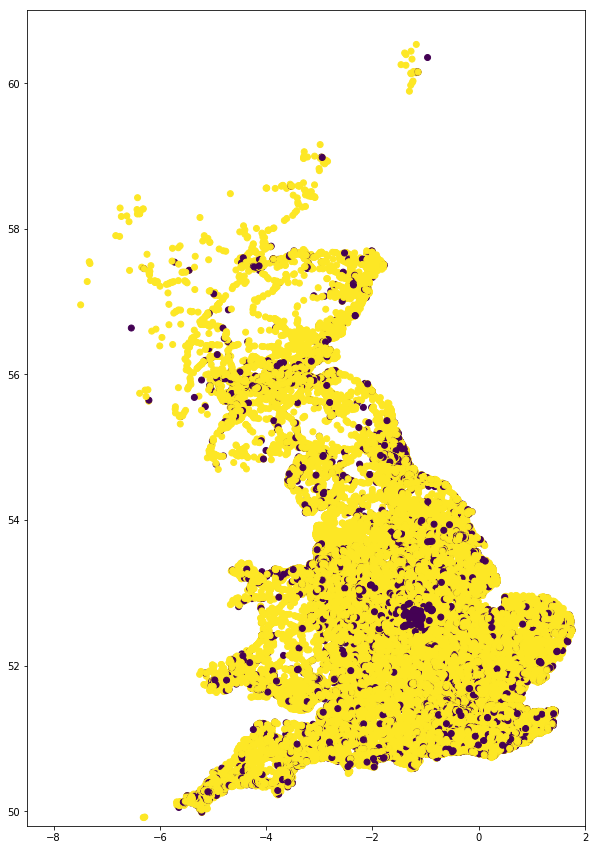

In [21]:
plt.figure(figsize=(10,15))
plt.scatter(data['Longitude'],data['Latitude'],c=data['Did_Police_Officer_Attend_Scene_of_Accident'])
plt.ylim((49.8,61))
plt.xlim((-8.5,2))
plt.show()

### Casualties


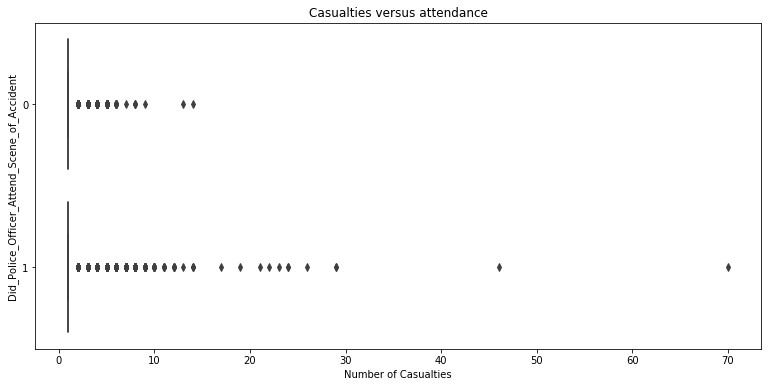

In [22]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='Did_Police_Officer_Attend_Scene_of_Accident', x='Number_of_Casualties', data=data, orient='h')
plt.title('Casualties versus attendance')
plt.xlabel('Number of Casualties')
plt.show()

 ### Number of vehicles

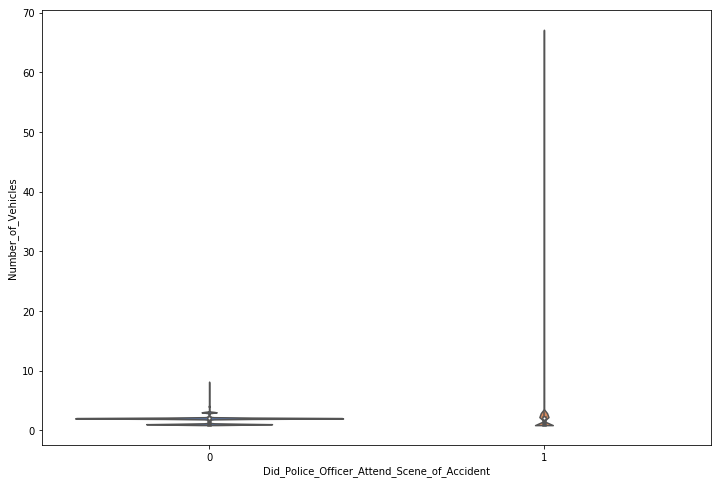

In [23]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.violinplot(x="Did_Police_Officer_Attend_Scene_of_Accident", y="Number_of_Vehicles",data=data, palette="muted")

 ### Urban or rural area

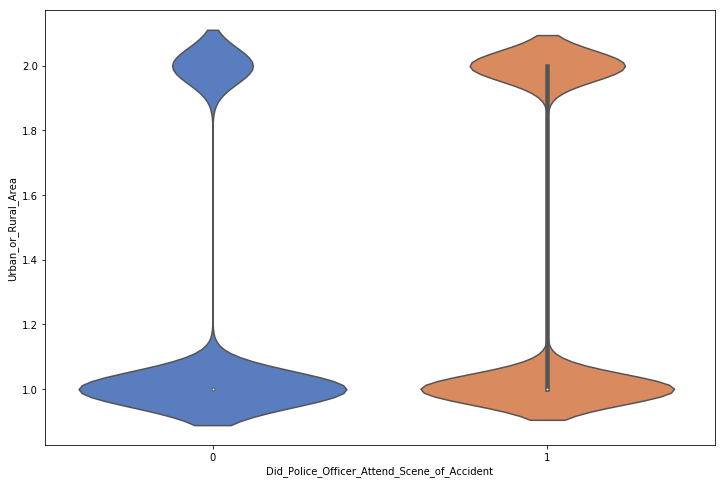

In [24]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.violinplot(x="Did_Police_Officer_Attend_Scene_of_Accident", y="Urban_or_Rural_Area",data=data, palette="muted")

### Correlation 

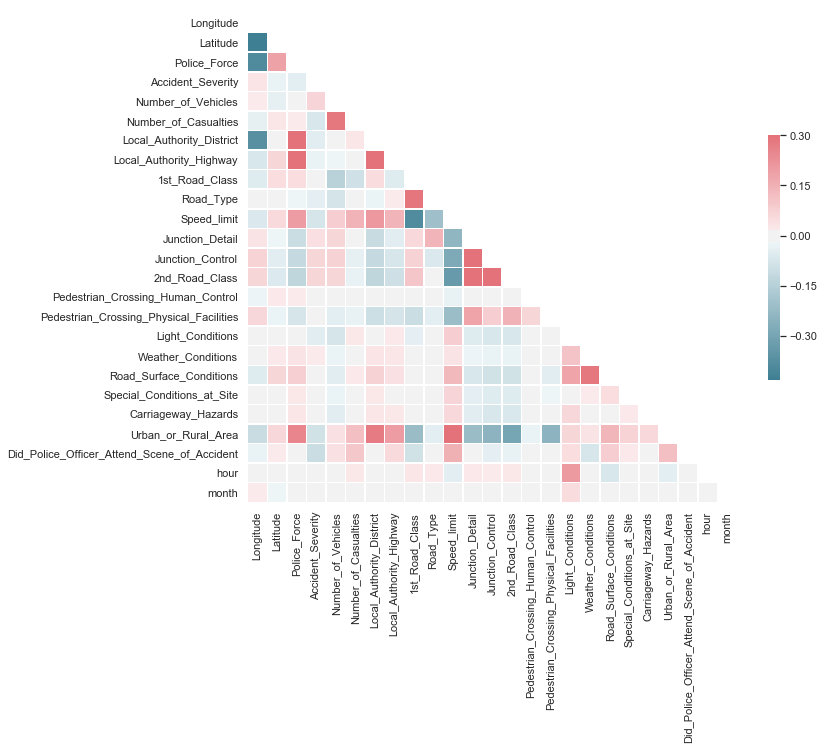

In [25]:

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Transforming variables - Feature Engineering

In [26]:
###### TRASNFORMING VARIABLES 

### FUTURE VAR FINE_WEATHER ( values 4,1 -->1 , Resto -->0)
#data.loc[data['Weather_Conditions']==4, ['Weather_Conditions']] = 1
#data.loc[data['Weather_Conditions']>1, ['Weather_Conditions']] = 0
#data.rename(columns={'Weather_Conditions':'Fine_Weather'}, inplace=True)


### FUTURE VAR DRY_ROAD( values !=1 -->0 , Resto -->0)
#data.loc[data['Road_Surface_Conditions']!=1, ['Road_Surface_Conditions']] = 0
#data.rename(columns={'Road_Surface_Conditions':'Dry_Road'}, inplace=True)


### FUTURE VAR ENOUGH_LIGHT( values 4,1 -->1 , Resto -->0)
#data.loc[data['Light_Conditions']==4, ['Light_Conditions']] = 1
#data.loc[data['Light_Conditions']>1, ['Light_Conditions']] = 0
#data.rename(columns={'Light_Conditions':'Enough_Light'}, inplace=True)


### ACTUAL VAR CARRIAGE_HAZARDS( values >1-->1  , Resto -->0)
#data.loc[data['Carriageway_Hazards']>1, ['Carriageway_Hazards']] = 1

### ACTUAL VAR SPECIAL_CONDITIONS_AT_SIGHT ( values >0-->1  , Resto -->0)
#data.loc[data['Special_Conditions_at_Site']>0, ['Special_Conditions_at_Site']] = 1


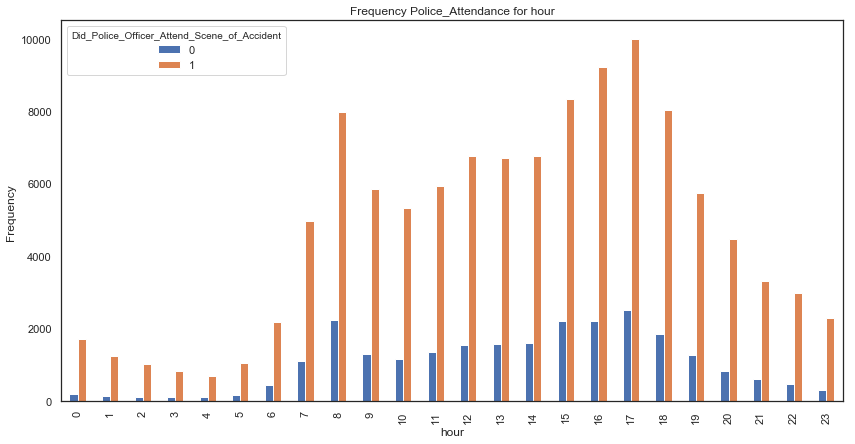

In [27]:
%matplotlib inline
pd.crosstab(data.hour,data.Did_Police_Officer_Attend_Scene_of_Accident).plot(kind='bar',figsize=(14, 7))
plt.title('Frequency Police_Attendance for hour')
plt.xlabel('hour')
plt.ylabel('Frequency ')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


<function matplotlib.pyplot.show(*args, **kw)>

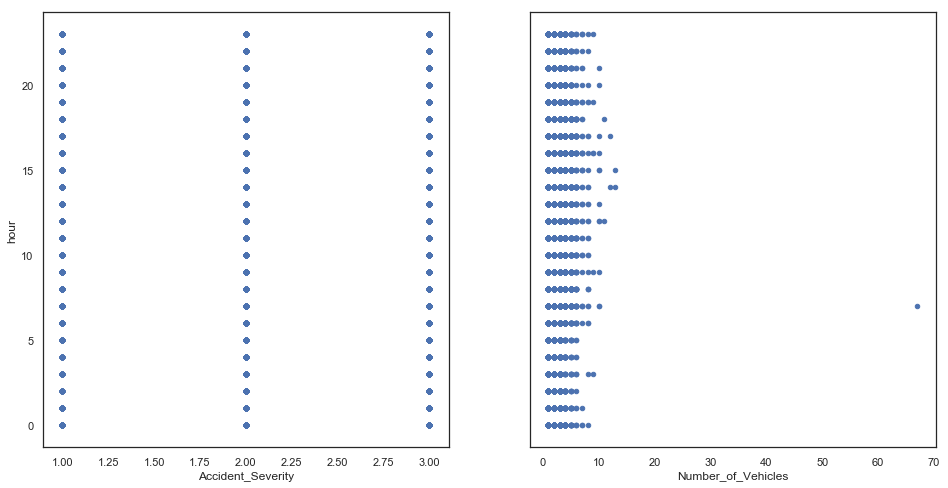

In [28]:
# visualize the relationship between the features and the response using scatterplots# visua 
fig, axs = plt.subplots(1, 2, sharey=True)
data.plot(kind='scatter', x='Accident_Severity', y='hour', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Number_of_Vehicles', y='hour', ax=axs[1])
#data.plot(kind='scatter', x='Fine_Weather', y='hour', ax=axs[2])
plt.show

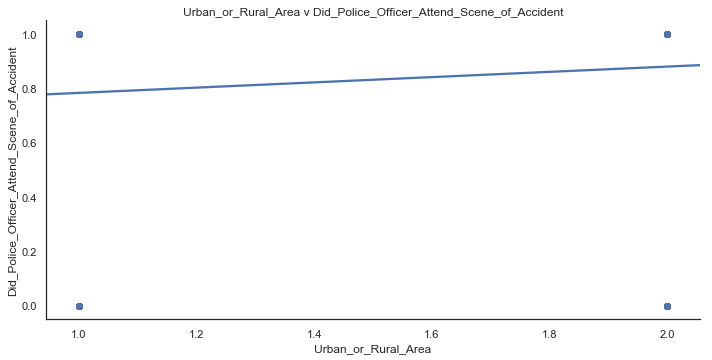

In [29]:
sns.lmplot(x='Urban_or_Rural_Area', y='Did_Police_Officer_Attend_Scene_of_Accident', data=data, size=5, aspect=2)
plt.title("Urban_or_Rural_Area v Did_Police_Officer_Attend_Scene_of_Accident")
# Show plot
plt.show()

<Figure size 432x288 with 0 Axes>

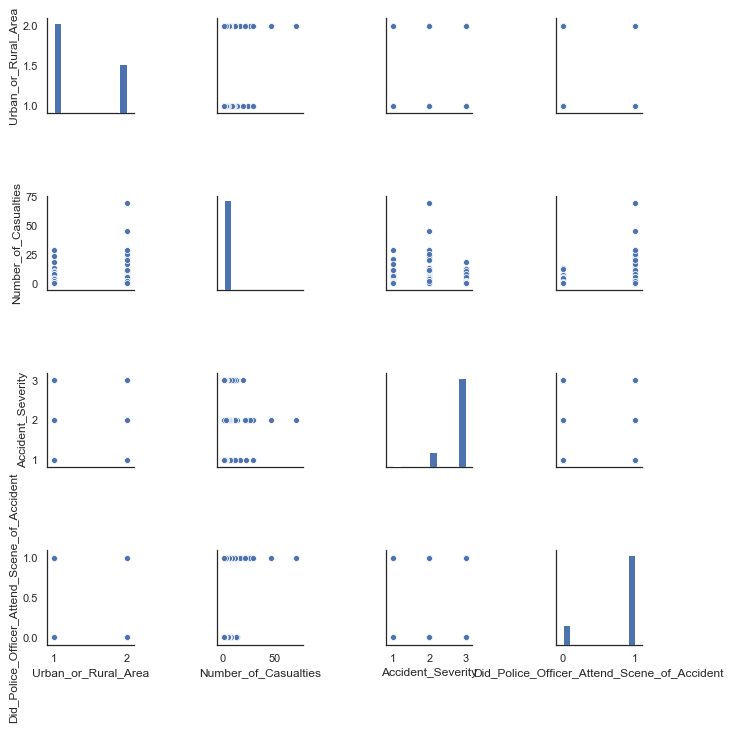

In [30]:
plt.figure()
sns.pairplot(data=data[["Urban_or_Rural_Area",
                        "Number_of_Casualties",
                        "Accident_Severity",
                        "Did_Police_Officer_Attend_Scene_of_Accident"
                                              ]])

In [31]:
#!wget https://geoportal.statistics.gov.uk/Docs/Names%20and%20Codes/Lower_layer_super_output_areas_\(E+W\)_2013_Names_and_Codes.zip

### TRAIN_TEST_SPLIT

In [32]:
y = data['Did_Police_Officer_Attend_Scene_of_Accident']
X = data.drop(['Did_Police_Officer_Attend_Scene_of_Accident'], axis=1)


In [33]:
x_train, x_test, y_train, y_test = \
  train_test_split(X, y, test_size=0.3, random_state=123)

 ## Logistic Regression

In [34]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [36]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  233  7513]
 [   95 33755]]


In [37]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.03      0.06      7746
           1       0.82      1.00      0.90     33850

   micro avg       0.82      0.82      0.82     41596
   macro avg       0.76      0.51      0.48     41596
weighted avg       0.80      0.82      0.74     41596



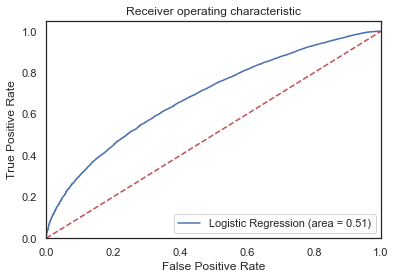

In [38]:

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

###  XGBoost


In [39]:
%%capture output
from time import time
gbm = xgb.XGBRegressor( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="binary:logistic",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

eval_set=[(x_train,y_train),(x_test,y_test)] #tracking train/validation error as we go
t1 = time()
fit_model = gbm.fit( 
                    x_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='auc',
                    early_stopping_rounds=50,
                    verbose=True #gives output log as below
                   )

fit_time = time() - t1

In [40]:
str(output)

outs = str(output).split(':')[1:]




In [41]:
outs

['0.633596\tvalidation_1-auc',
 '0.633908\nMultiple eval metrics have been passed',
 " 'validation_1-auc' will be used for early stopping.\n\nWill train until validation_1-auc hasn't improved in 50 rounds.\n[1]\tvalidation_0-auc",
 '0.65073\tvalidation_1-auc',
 '0.64979\n[2]\tvalidation_0-auc',
 '0.670902\tvalidation_1-auc',
 '0.66944\n[3]\tvalidation_0-auc',
 '0.671457\tvalidation_1-auc',
 '0.670463\n[4]\tvalidation_0-auc',
 '0.679569\tvalidation_1-auc',
 '0.679212\n[5]\tvalidation_0-auc',
 '0.680765\tvalidation_1-auc',
 '0.68008\n[6]\tvalidation_0-auc',
 '0.677409\tvalidation_1-auc',
 '0.676502\n[7]\tvalidation_0-auc',
 '0.679092\tvalidation_1-auc',
 '0.67847\n[8]\tvalidation_0-auc',
 '0.679513\tvalidation_1-auc',
 '0.678852\n[9]\tvalidation_0-auc',
 '0.683584\tvalidation_1-auc',
 '0.682875\n[10]\tvalidation_0-auc',
 '0.690178\tvalidation_1-auc',
 '0.690353\n[11]\tvalidation_0-auc',
 '0.690054\tvalidation_1-auc',
 '0.690241\n[12]\tvalidation_0-auc',
 '0.692309\tvalidation_1-auc',
 '0

In [42]:
# predict using n_estimators with lowest validation error

rmse=mean_squared_error
rmse(gbm.predict(x_test, ntree_limit=gbm.best_ntree_limit),y_test) 

0.13275221651552432

In [43]:
rmse(gbm.predict(x_train, ntree_limit=gbm.best_ntree_limit),y_train) 

0.12716707755504786

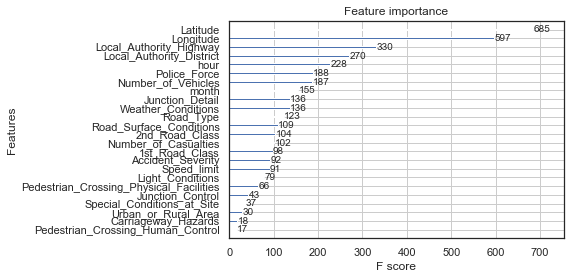

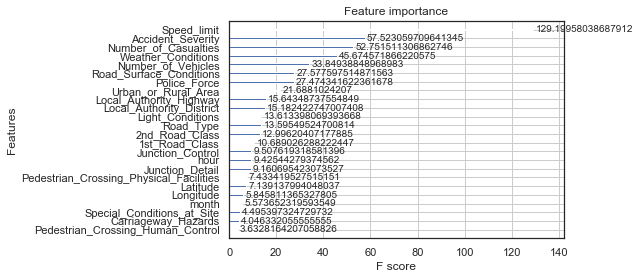

In [44]:
xgb.plot_importance(gbm)
xgb.plot_importance(gbm, importance_type='gain');

In [45]:
roc_auc_score(y_test, gbm.predict(x_test))

0.7441557294926319

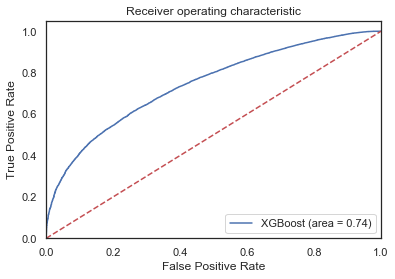

In [46]:
logit_roc_auc = roc_auc_score(y_test, gbm.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict(x_test))
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Final submission

In [47]:
data_validation = pd.read_csv('test_data.csv', delimiter=',', encoding='latin1')

In [48]:
data_val = data_validation.copy()

In [49]:
data_val['Did_Police_Officer_Attend_Scene_of_Accident']=data_val['Did_Police_Officer_Attend_Scene_of_Accident'].replace(2,0)
data_val.drop(data_val.loc[data_val['Did_Police_Officer_Attend_Scene_of_Accident']==-1].index, inplace=True)

In [50]:
data_val.rename(columns={'Local_Authority_(District)':'Local_Authority_District',
                       'Local_Authority_(Highway)':'Local_Authority_Highway',

                     'Pedestrian_Crossing-Human_Control':'Pedestrian_Crossing_Human_Control',
                          'Pedestrian_Crossing-Physical_Facilities':'Pedestrian_Crossing_Physical_Facilities'}, 
                 inplace=True)

In [51]:
data_val['Local_Authority_Highway'] = encoder.fit_transform(data_val.Local_Authority_Highway.values)
data_val['Local_Authority_District'] = encoder.fit_transform(data_val.Local_Authority_District.values)


In [52]:
data_val['hour'] = pd.to_datetime(data_val['Time'], format='%H:%M').dt.hour
data_val.dropna(subset=['hour'],  inplace=True)
data_val['hour'] = data_val['hour'].apply(np.int64)
data_val['month'] = pd.to_datetime(data_val['Date'], format='%d/%m/%Y' ).dt.month


In [53]:
data_val.drop('Time', axis=1, inplace=True)
data_val.drop('Date', axis=1, inplace=True)
data_val.drop('LSOA_of_Accident_Location', axis=1, inplace=True)

data_val.drop('Location_Easting_OSGR', axis=1, inplace=True)
data_val.drop('Location_Northing_OSGR', axis=1, inplace=True)
data_val.drop('1st_Road_Number', axis=1, inplace=True)
data_val.drop('2nd_Road_Number', axis=1, inplace=True)
data_val.drop('Day_of_Week', axis=1, inplace=True)

data_val.drop('Accident_Index', axis=1, inplace=True)






In [54]:
y_val = data_val['Did_Police_Officer_Attend_Scene_of_Accident']
x_val = data_val.drop(['Did_Police_Officer_Attend_Scene_of_Accident'], axis=1)


In [55]:
pred = gbm.predict(x_val, ntree_limit=gbm.best_ntree_limit, validate_features=True)

In [56]:
df_pred = pd.DataFrame({'pred': pred})

In [ ]:
df_pred.count ()

In [57]:
data_val['Prediction'] = df_pred.pred

In [59]:
Submission = pd.concat([data_validation['Accident_Index'], data_val['Prediction']], axis=1)


In [60]:
Submission.head()

,Accident_Index,Prediction
0,201401BS70277,0.537261
1,201401BS70278,0.488411
2,201401BS70279,0.475462
3,201401BS70280,0.796264
4,201401BS70281,0.478312


In [61]:
Submission.to_csv('final_submission_XGBOOST.csv', index = False)